<h1> Black Holes in the Database </h1>

Many galaxies/halos have supermassive black holes associated with them in the simulation. Here we will go over some of the basic ways we can access information about black holes and relate them back to their host galaxies/halos (and vice versa)

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

<h3> Finding Black Holes in the Database </h3>

In [2]:
# many galaxies/halos have supermassive black holes associated with them in the simulation
# If you look at the available properties for a halo, you may see several "BH" and "BH_central" properties pop up

halo = db.get_halo('cosmo25/%7779/1') # get halo 1, the most massive halo in the simulation at timestep number 7779
halo.keys()                           #prints out all of the available properties

['shrink_center',
 'max_radius',
 'Mvir',
 'Mgas',
 'Mbar',
 'Mstar',
 'dustExt_V',
 'dustExt_B',
 'dustExt_K',
 'dustExt_U',
 'dustExt_J',
 'dustExt_I',
 'SFR_histogram',
 'SFR_encl_25Myr',
 'SFR_encl_250Myr',
 'MColdGas',
 'MHIGas',
 'gas_image_sideon',
 'stellar_image_sideon',
 'gas_image_faceon',
 'stellar_image_faceon',
 'gas_image_original',
 'stellar_image_original',
 'inner_SFR_histogram',
 'gas_inflow_Mdot',
 'gas_outflow_Mdot',
 'gas_inflow_vel',
 'gas_outflow_vel',
 'gas_inflow_vel2',
 'gas_outflow_vel2',
 'gas_inflow_temp',
 'gas_outflow_temp',
 'compton_y_map',
 'v_surface_brightness',
 'b_surface_brightness',
 'i_surface_brightness',
 'lambda',
 'lambdaE',
 'lambda_gas',
 'lambdaE_gas',
 'vdisp_stars',
 'vdisp_gas',
 'vdisp_dm',
 'HIMass_encl',
 'ColdGasMass_encl',
 'dm_density_profile',
 'dm_mass_profile',
 'tot_density_profile',
 'tot_mass_profile',
 'gas_density_profile',
 'gas_mass_profile',
 'star_density_profile',
 'star_mass_profile',
 'b',
 'c',
 'b_star',
 'c_sta

In [3]:
# That's a lot of black holes! Turns out, this was one of our major results from Romulus. 
# More massive halos/galaxies host a ton of "wandering" supermassive black holes. The most massive halo in this simulation, therefore, hosts the most.
# But, even smaller galaxies can host multiple black holes. Let's look at a lower mass galaxy more similar to the Milky Way

halo = db.get_halo('cosmo25/%7779/44') #get halo 44 from timestep number 7779

# We look at all of the black holes in the halo by asking for the property "BH"

print(halo['BH'])

#Note that this property is a LIST. More specifically, it is a list of black hole objects.



[<BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1982370040' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1981821731' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1981868982' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1981825340' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1985446420' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1987261312' | NDM=0 Nstar=0 Ngas=0>]


In [4]:
# If we want to examine only one BH, we can provide an index

print(halo['BH'][0]) #print out the first black hole object associated with halo number 48



<BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1982370040' | NDM=0 Nstar=0 Ngas=0>


In [5]:
# You may notice there are two kinds of BHs associated with a galaxy/halo. 
# "BH" list ALL the black holes within the entire dark matter halo (i.e. the BHs in the galaxy and anything gravitationally bound to it)
# The "BH_central" property excludes any BH that is associted with SUBSTRUCTURE, or halos/galaxies that are orbiting the galaxy we care about.
# This will often be the BHs that we care about. These are the ones associated with our target galaxy, rather than some other galaxy orbiting around it.

print(halo['BH_central'])



[<BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1982370040' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1981868982' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1985446420' | NDM=0 Nstar=0 Ngas=0>, <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1987261312' | NDM=0 Nstar=0 Ngas=0>]


In [6]:
# Because of how they are defined, BH_central is a SUBSET of of BH (every object in "BH_central" is also bound to the halo, so is also included in "BH")

print(len(halo['BH']), len(halo['BH_central'])) #if we check their numbers with len(), indeed there are fewer "BH_central" objects.



6 4


In [7]:

# Now, each black hole is itself an object stored in the database. In fact, they are treated similar to halos/galaxies.
# Just like a halo/galaxy, black holes store various properties about themselves
# You can list off these available properties the same way you would with a galaxy/halo

bh = halo['BH_central'][0] # make a new variable "bh" to save the first central BH in halo number 48
bh.keys()                  # list the available properties associated with this BH



['BH_mdot_histogram',
 'BH_mdot_histogram_ave',
 'BH_mdot',
 'BH_mdot_ave',
 'BH_mdot_std',
 'BH_central_offset',
 'BH_central_distance',
 'BH_mass',
 'host_halo',
 'tracker',
 'tracker']

In [8]:
# Some important properties of the black hole objects you'll want to keep in mind:

# The ID number associated with the BH. It seems like a random large number and, really, it mostly is. But this is how we keep track of them
print("BH id: ", bh.halo_number)

# The mass
print("BH Mass: ", bh['BH_mass'])

# The instantaneous accretion rate (i.e. how fast it is growing by consuming nearby gas)
print("BH instantaneous accretion (or growth) rate (in solar masses per year)", bh['BH_mdot'])

# The accretion rate averaged over the last timestep (~1.7 Million Years)
print("Average BH Accretion rate over the last 1.7 Myr (in solar masses per year): ", bh['BH_mdot_ave'])

# The distance from the center of the black hole's host galaxy
print("Distance to galaxy center (in kpc): ", bh['BH_central_distance'] )

# The Host halo of the black hole
print("BH Host Halo:", bh['host_halo'])


BH id:  1982370040
BH Mass:  80769767.94
BH instantaneous accretion (or growth) rate (in solar masses per year) 5.451146509584221e-05
Average BH Accretion rate over the last 1.7 Myr (in solar masses per year):  3.934360964553104e-05
Distance to galaxy center (in kpc):  0.016820025829116833
BH Host Halo: <Halo 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/halo_44' | NDM=2396369 Nstar=940310 Ngas=572627>


<h3> Black Holes are LINKED to Their Host Galaxies </h3>

Note above that the 'host_halo' property of a black hole returns the host galaxy/halo object within the database, similar to how the "BH_central" and "BH" properties of a galaxy/halo returns the black hole object. We can often utilize this fact when gathering more information from the simulation.

In [9]:
# The 'host_halo' property returns a halo/galaxy object. 

bh_host = bh['host_halo']
halo44 = db.get_halo('cosmo25/%7779/44')

# These two objects are literally the same thing because 'host_halo' and get_halo are returning the exact same object here.

print(bh_host, halo44)

<Halo 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/halo_44' | NDM=2396369 Nstar=940310 Ngas=572627> <Halo 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/halo_44' | NDM=2396369 Nstar=940310 Ngas=572627>


In [10]:
# We can even ask python if the two results are the same!

# Note the double == here denotes a logical statemt: "is bh_host exactly equal to/the same as halo44?"
print(bh_host==halo44) #this will print True if both objects are exactly the same



True


<h3> Gathering Properties of All Black Holes in a Timestep </h3>

In [11]:
# Because black holes behave just like halos/galaxies in the database, we can use many of the same techniques to look at all the black holes at once

#Here we gather data on the ID number, mass, accretion rate, and distance to host center for every black hole in step 7779

#first get the step we want
step = db.get_timestep('cosmo25/%7779')

# Then ask for the properties.
# The datebase will search ALL objects for the properties we ask for and give all the results
# But only black holes have the ones we are asking for
# Similarly, when we asked for Mstar or Mvir, only halos/galaxies had those properties

bhid, mass, mdot, dist = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot', 'BH_central_distance')



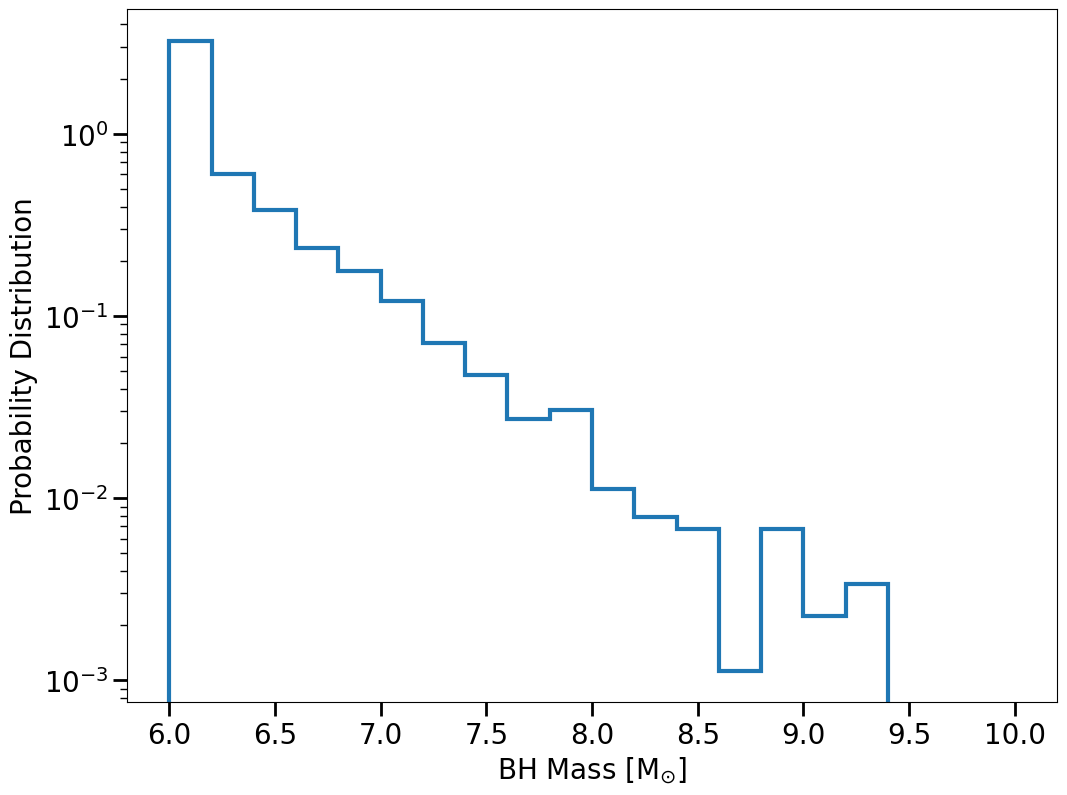

In [12]:
# Now we can plot the proerties we got!
# First, a histogram of BH masses
# Note, it is useful here to use log10 because masses can range from 10^6 to 10^10 solar masses (over four orders of magnitude!)
# Also, typically, we care about the shape of the histogram and less about the total numbers.
# Our simulation has a finite volume. To some extend, the total numbers we get are a product of the size. A bigger simulation will have more black holes
# But, more fundamental to our simulation is the RELATIVE numbers. So, it is useful to normalize your plot
# So, rather than a histogram (Number of Objects vs Some Property) we normalize by both the size of our bins (x-axis ranges) and the total number of objects
# This is done using the density=True keyword.

plt.hist(np.log10(mass), range=[6,10], bins=20, density=True, histtype='step', lw=3) # lw is another useful keyword. It sets the line width to be thicker when > 1.
plt.ylabel('Probability Distribution')                 # this is what we cann the value when normalized in this way
plt.xlabel('BH Mass [M$_{\odot}$]')                    # An example of a useful math command. \odot creates the symbol we use for "solar mass"
plt.yscale('log')                                      # Set the y-axis to be log-scale. 
                                                            # Try commenting this line out with a '#' at the start to see how it looks!

    

/tmp/ipykernel_176274/2561712493.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(mass), np.log10(mdot), marker='o', c='k')


Text(0, 0.5, 'Accretion Rate [M$_{\\odot}/yr$]')

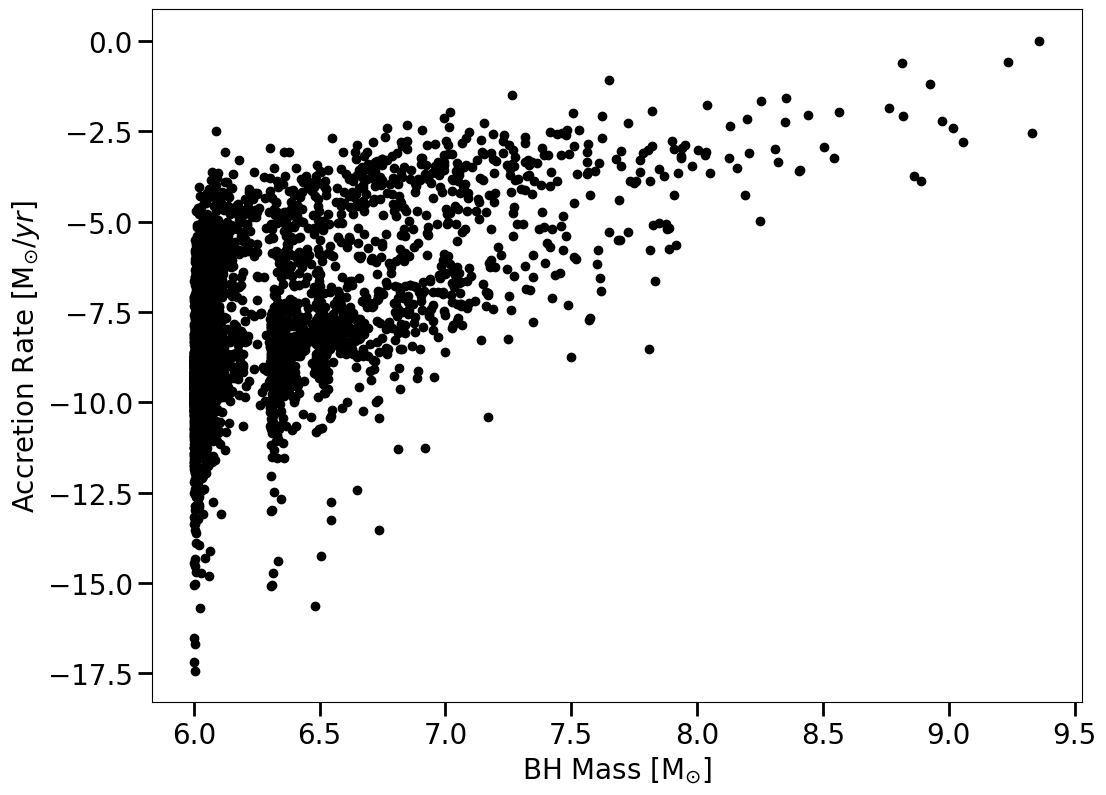

In [13]:
# We can also make scatter plots like before

#here c denotes the color and "k" stands for black. Some other colors: "r" = Red, "g" = green, "b" = blue, "o" = orange, "c" = cyan
plt.scatter(np.log10(mass), np.log10(mdot), marker='o', c='k')
plt.xlabel('BH Mass [M$_{\odot}$]')
plt.ylabel('Accretion Rate [M$_{\odot}/yr$]')



In [17]:
# We can utilize the connection between BHs and their hosts to gather properties of host galaxies for all black holes
# For exampe, here we are extracting the BH ID, BH mass, and host galaxy stellar mass
# The general format for asking for such a property is "host_halo.halo_property".
# When calculate_all() sees a property like this, it knows to find the property "halo_property" for each "host_halo" of each BH.
# Note that because a single galaxy/halo can host multiple BHs, doing this will result in multiple BHs having the same halo/galaxy properties

bhid, bhmass, host_mstar = step.calculate_all('halo_number()', 'BH_mass', 'host_halo.Mstar')



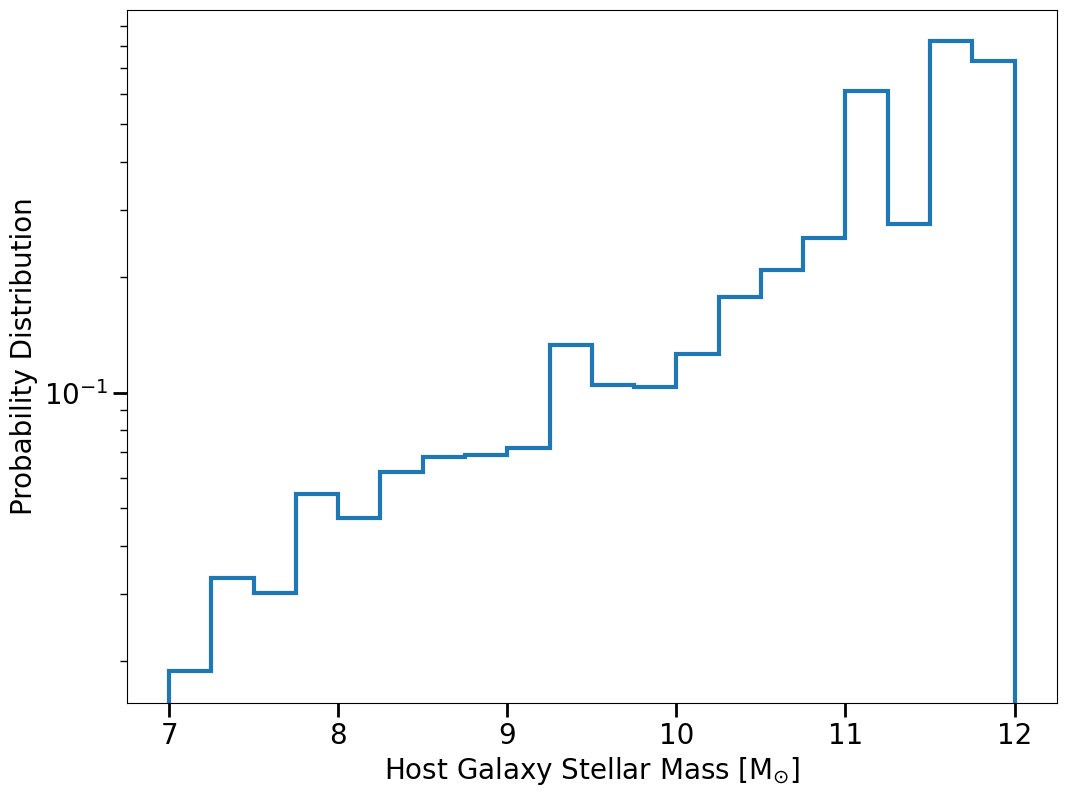

In [15]:
# Now we can plot another histogram, this time using the host galaxy stellar mass
# What this tells us is the environment in which most BHs exist
# If we were to select a BH at random, in what galaxy are we most likely to find it?

plt.hist(np.log10(host_mstar), range=[7,12], bins=20, density=True, histtype='step', lw=3) # lw is another useful keyword. It sets the line width to be thicker when > 1.
plt.ylabel('Probability Distribution')                 # this is what we cann the value when normalized in this way
plt.xlabel('Host Galaxy Stellar Mass [M$_{\odot}$]')                    # An example of a useful math command. \odot creates the symbol we use for "solar mass"
plt.yscale('log')                                      # Set the y-axis to be log-scale. 




Text(0.5, 0, 'Galaxy Stellar Mass [M$_{\\odot}$]')

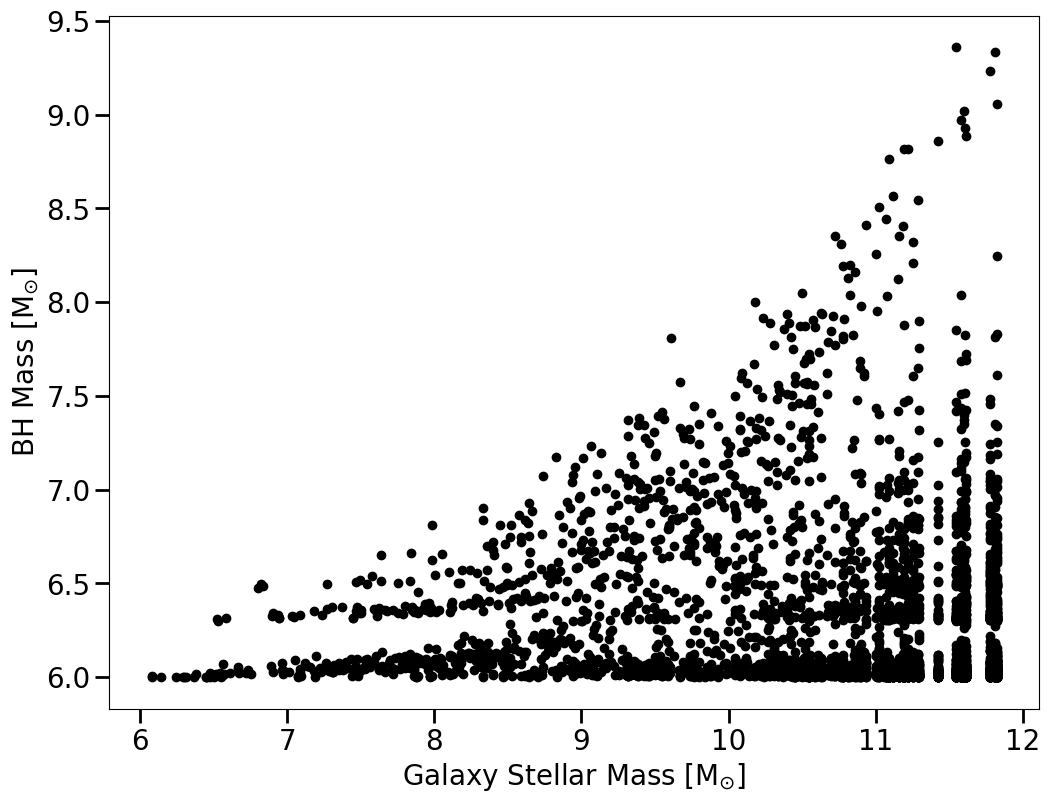

In [18]:
# Now we can re-create a famous relationship between BH mass and galaxy mass
plt.scatter(np.log10(host_mstar), np.log10(bhmass), marker='o', c='k')
plt.ylabel('BH Mass [M$_{\odot}$]')
plt.xlabel('Galaxy Stellar Mass [M$_{\odot}$]')

# You might notice that there doesn't seem to be a very good relation at all... 
# That's because we are plotting using the BHs. But, multiple BHs can exist in the same galaxy
# A better way of plotting would be to treat the BH as a property of each *galaxy* 
# so that each would have one BH mass associated with it
# To do this, we will need to use the fact that BHs and galaxies are LINKED

<h3> Utilizing Links to Collect BH Properties from Galaxies </h3>

Now we can go the other direction and find properties of black holes for each galaxy. Typically, we will want to collect information on either the most massive BH, or the most central, or the one that is growing the fastest. This section shows you how to do this. This will use the "live calculation" function link() which is described in some detail <a href=https://github.com/pynbody/tangos/blob/master/docs/live_calculation.md> here</a>.

The general syntax to extract a linked property of a halo is `my_halo.calculate('link(my_link_name, link_property, "max/min", constraint1, constraint2, ...constrantN)')`

In our case for black holes `my_link_name` will (typically) be `BH_central`, `link_property` will be the property you want to select the min/max value of (e.g. `BH_mass`) and constraints1,2,...,N will be logical expressions to further make your selection. For example, stating `BH_central_distance<1` will only select BHs within 1 kpc of the galaxy center.

In [19]:
# Ok here is an example.
# Here we are finding the central BH with the largest mass that is also within 0.7 kpc of the galaxy's center
# The result of this calculation is a BH object itself, which we can extract information from, like it's mass and accretion rate

my_halo = db.get_halo('cosmo25/%7779/4')
my_bh = my_halo.calculate('link(BH_central,BH_mass, "max", BH_central_distance<0.7)')
print(my_bh)
print("My BH's mass: ", my_bh['BH_mass'])
print("My BH's accretion rate: ", my_bh['BH_mdot'])
print("My BH's id number: ", my_bh.halo_number)




<BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1981810355' | NDM=0 Nstar=0 Ngas=0>
My BH's mass:  2289326958.0
My BH's accretion rate:  1.0314859918388386
My BH's id number:  1981810355


Text(0.5, 0, 'Galaxy Stellar Mass [M$_{\\odot}$]')

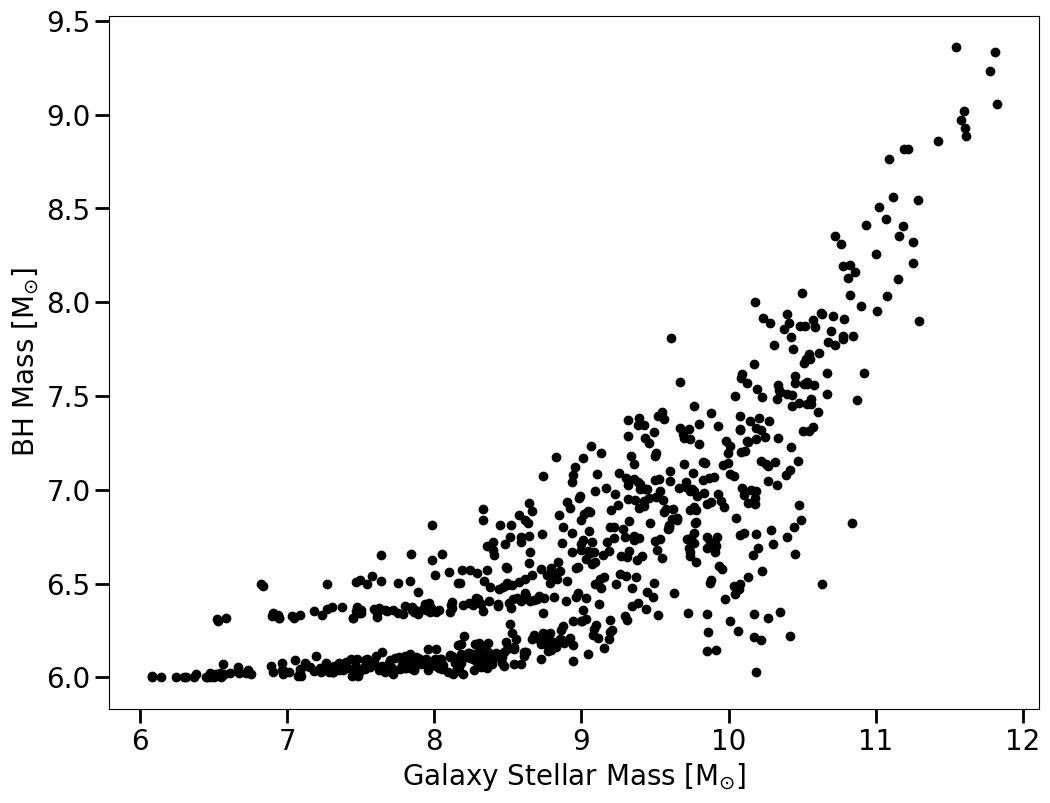

In [20]:
# Now we can apply these links to collect BH masses for all of our galaxies.
# In this case, we want to find the most MASSIVE black hole in each galaxy
# We also want to select BHs near the center to avoid including any wandering BHs
# we can ask for the property of a linked object by adding `.property_name` after link()
# the .BH_mass at the end of the link function will collect BH_mass from each linked BH selected to have the maximum BH mass
# and within 0.7 kpc from the galaxy center

mstar, mbhcen = sim.timesteps[-4].calculate_all('Mstar','link(BH_central,BH_mass, "max", BH_central_distance<0.7).BH_mass')
plt.scatter(np.log10(mstar), np.log10(mbhcen), marker='o', c='k')
plt.ylabel('BH Mass [M$_{\odot}$]')
plt.xlabel('Galaxy Stellar Mass [M$_{\odot}$]')

Text(0.5, 0, 'Galaxy Star Formation Rate [M$_{\\odot}/yr$]')

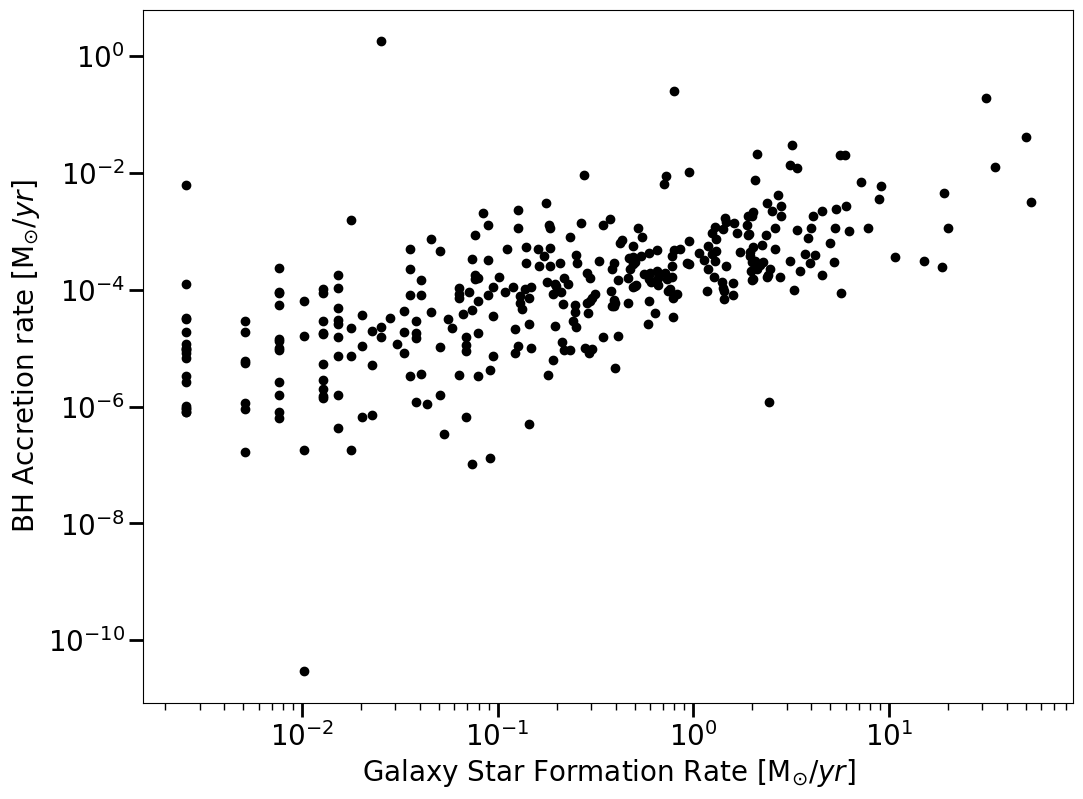

In [22]:
# Now let's look at some different quantities and see how accretion rate relates to star formation rate
# For the galaxy, we use the at() function to find the value of the histogram SFR_encl_25Myr at 10 kpc
# For the BH, we now collect BH_mdot_ave and also select for the maximum accretion rate instead of mass.

sfr_10, mdotbhcen = sim.timesteps[-4].calculate_all('at(10,SFR_encl_25Myr)','link(BH_central,BH_mdot_ave, "max", BH_central_distance<0.7).BH_mdot_ave')
ok_to_use = (sfr_10 > 0) & (mdotbhcen>0 ) #only select ones with non-zero values for both quantities
plt.scatter(sfr_10[ok_to_use], mdotbhcen[ok_to_use], marker='o', c='k') #plot while applying the selection criteria above
plt.yscale('log')
plt.xscale('log')
plt.ylabel('BH Accretion rate [M$_{\odot}/yr$]')
plt.xlabel('Galaxy Star Formation Rate [M$_{\odot}/yr$]')



Text(0.5, 0, 'Galaxy Star Formation Rate [M$_{\\odot}/yr$]')

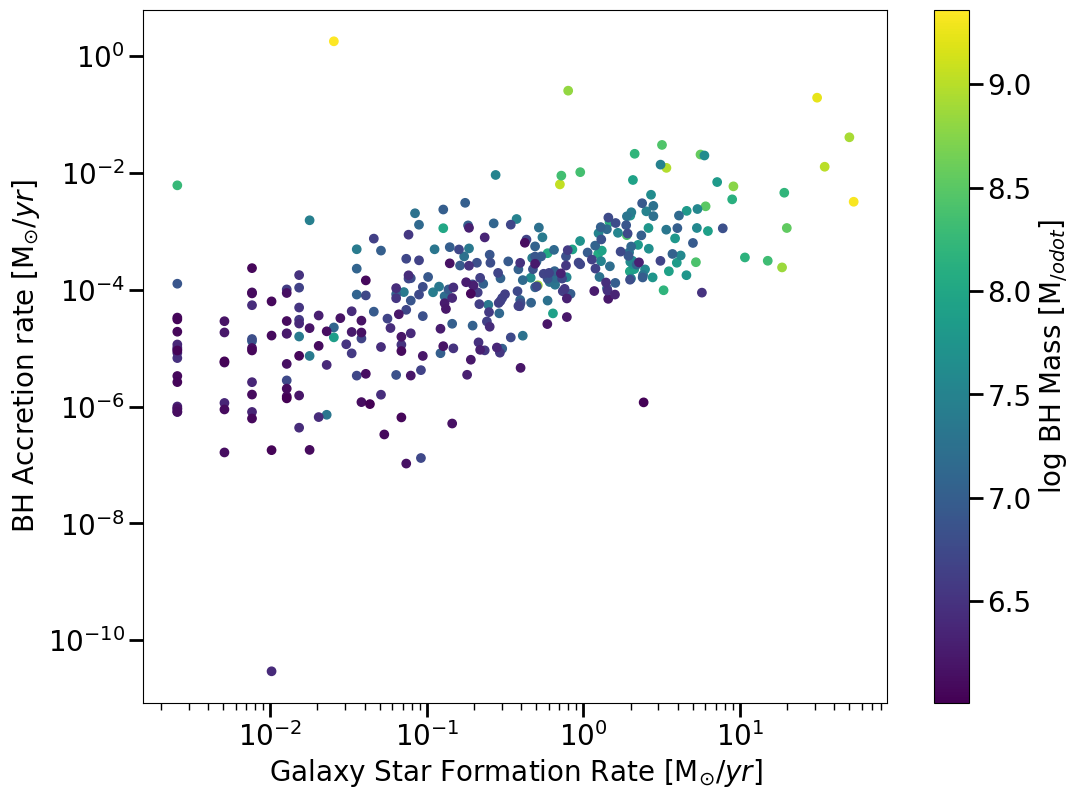

In [23]:
# We can make the same plot but colored by different galaxy or BH properties. In this case, I color by BH mass

sfr_10, mdotbhcen, mbh = sim.timesteps[-4].calculate_all('at(10,SFR_encl_25Myr)',
                                                         'link(BH_central,BH_mdot_ave, "max", BH_central_distance<0.7).BH_mdot_ave',
                                                         'link(BH_central,BH_mdot_ave, "max", BH_central_distance<0.7).BH_mass')
ok_to_use = (sfr_10 > 0) & (mdotbhcen>0 ) #only select ones with non-zero values for both quantities
plt.scatter(sfr_10[ok_to_use], mdotbhcen[ok_to_use], marker='o', c=np.log10(mbh[ok_to_use]),cmap='viridis') #plot while applying the selection criteria above
plt.colorbar(label='log BH Mass [M$_{/odot}$]') #now that we are coloring our points, provide a colorbar!
plt.yscale('log')
plt.xscale('log')
plt.ylabel('BH Accretion rate [M$_{\odot}/yr$]')
plt.xlabel('Galaxy Star Formation Rate [M$_{\odot}/yr$]')



<h3> Things to Try on your Own </h3>

1) re-make the Mbh-Mstar and Mdot - SFR plots, coloring by different properties. Some interesting ones to try: 
    - MColdGas (totdal cold gas mass of the galaxy)
    - ColdGasMass_encl (cold gas mass enclosed by different radii. use the at() function for this)
    - gas_mass_profile (similar to above but for total gas mass; again use at())
    - star_mass_profile (similar to above but for total stellar mass)
    - Mstar (total stellar mass of the galaxy)
    - BH_mass
    - BH_mdot
    
2) look back at the tangos_intro notebook. based on some of the properties you've made scatter plots for in this notebook and in that one (e.g. mdot-sfr, mstar-mhalo, etc) pick some galaxies to look at in more detail. Look at their images and their time evolution and star formation histories.